<a href="https://colab.research.google.com/github/JonHaz/Capstone-2-LVMH-Sales-in-Iowa/blob/main/LVMH_Capstone_Two_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Picking back up on where I left off from my previous notebook

In [8]:
!pip install sweetviz
!pip install pandas_profiling
#!pip install 

     |████████████████████████████████| 15.1 MB 163 kB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [10]:
#importing the modules I will be using for my EDA
from pathlib import Path

import requests
import numpy as np
import pandas as pd

import pandas_profiling
#from pandas_profiling.utils.cache import cache_file

import seaborn as sns
import sweetviz as sv

In [2]:
# I am establishing a connection to my Sandbox within BigQuery so that I can run SQL queries to interact with the data here within Google Collab
from google.colab import auth
auth.authenticate_user()
print('Authenticated')


Authenticated


In [3]:
# Save output in a variable `df`
%%bigquery --project storied-sound-253213 df
SELECT *
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE vendor_name LIKE '%HENNESSY%'

In [4]:
#applying a little data cleaning 
df['date'] = pd.to_datetime(df['date'])
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-30752900191,2020-10-05,2619,Hy-Vee Wine and Spirits / WDM,1725 74th St,West Des Moines,50266,POINT (-93.808855 41.598515),77,POLK,1012300,Single Malt Scotch,420,MOET HENNESSY USA,5104,Glenmorangie Nectar D'or,6,750,34.99,52.49,18,944.82,13.5,3.56
1,INV-20918000010,2019-07-30,3814,Costco Wholesale #788 / WDM,7205 Mills Civic Pkwy,West Des Moines,50266,POINT (-93.806489 41.561342),25,Dallas,1012300,Single Malt Scotch,420,MOET HENNESSY USA,5136,Glenmorangie 18YR,6,750,49.99,74.99,18,1349.82,13.5,3.56
2,INV-10472100006,2018-02-19,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1012300,Single Malt Scotch,420,MOET HENNESSY USA,990434,HA Glenmorangie Spios,6,750,49.99,74.99,30,2249.70,22.5,5.94
3,INV-07182900001,2017-09-12,2588,Hy-Vee Food and Drug #6 / Cedar Rapids,4035 Mt Vernon Rd SE,Cedar Rapids,52403,POINT (-91.60978 41.976835),57,LINN,1012300,Single Malt Scotch,420,MOET HENNESSY USA,5104,Glenmorangie Nectar D'or,6,750,35.49,53.24,36,1916.64,27.0,7.13
4,INV-06905200006,2017-08-28,4169,Super Quick 2 / Hubbell,1824 Hubbell Ave,Des Moines,50317,None,77,POLK,None,None,420,MOET HENNESSY USA,163,Hennessy VS Flask,24,200,5.99,8.99,24,215.76,4.8,1.27


I am applying a few functions within seaborn to get a jist of the shape of my data

In [6]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,175379.000000,175379.000000,175379.000000,175379.000000,175379.000000,175379.000000,175379.000000,175379.000000
mean,13.057048,559.205777,18.405245,27.611641,13.073971,258.761688,5.860328,1.544309
std,5.568170,315.831550,18.549437,27.824424,19.148897,353.846034,8.280079,2.187603
min,1.000000,50.000000,5.040000,7.560000,1.000000,0.000000,0.050000,0.010000
25%,12.000000,375.000000,10.490000,15.740000,3.000000,70.480000,1.500000,0.390000
50%,12.000000,375.000000,16.490000,24.740000,12.000000,188.880000,4.500000,1.180000
75%,12.000000,750.000000,20.990000,31.490000,12.000000,359.880000,9.000000,2.370000
max,24.000000,1750.000000,1729.480000,2594.220000,1200.000000,18894.000000,450.000000,118.870000


In [11]:

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

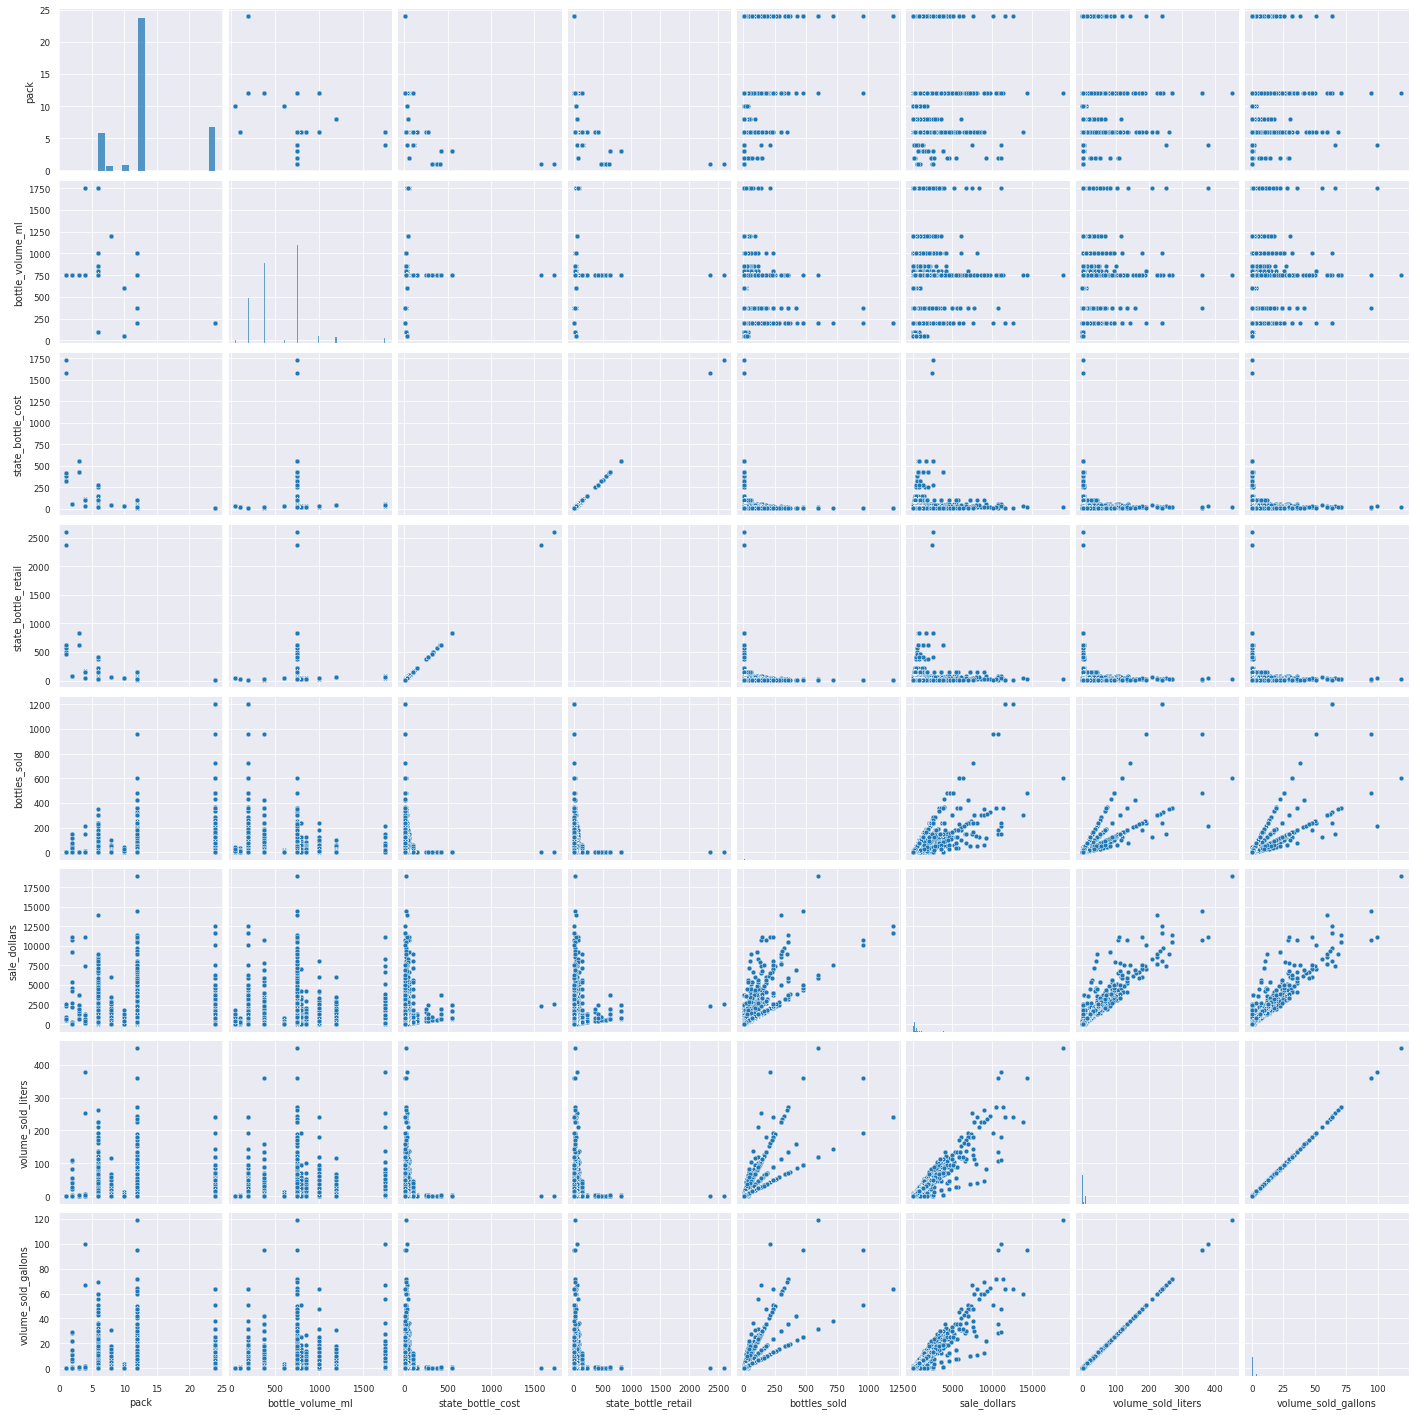

In [15]:
# This took sometime to run but it provides a high level over view of my data
sns.set_style('darkgrid')
sns.set_context('paper')
sns.pairplot(df)

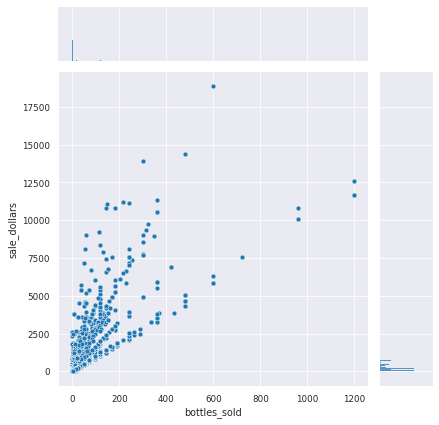

In [25]:
#using this function to create histograms of all of my numerical features
sns.jointplot(x=df['bottles_sold'], y=df['sale_dollars'])


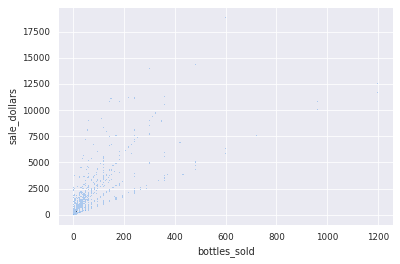

In [27]:
sns.hisplot(x=df['bottles_sold'], y=df['sale_dollars'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175379 entries, 0 to 175378
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   invoice_and_item_number  175379 non-null  object        
 1   date                     175379 non-null  datetime64[ns]
 2   store_number             175379 non-null  object        
 3   store_name               175379 non-null  object        
 4   address                  173783 non-null  object        
 5   city                     173783 non-null  object        
 6   zip_code                 173783 non-null  object        
 7   store_location           158121 non-null  object        
 8   county_number            173783 non-null  object        
 9   county                   173783 non-null  object        
 10  category                 174978 non-null  object        
 11  category_name            174978 non-null  object        
 12  vendor_number   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

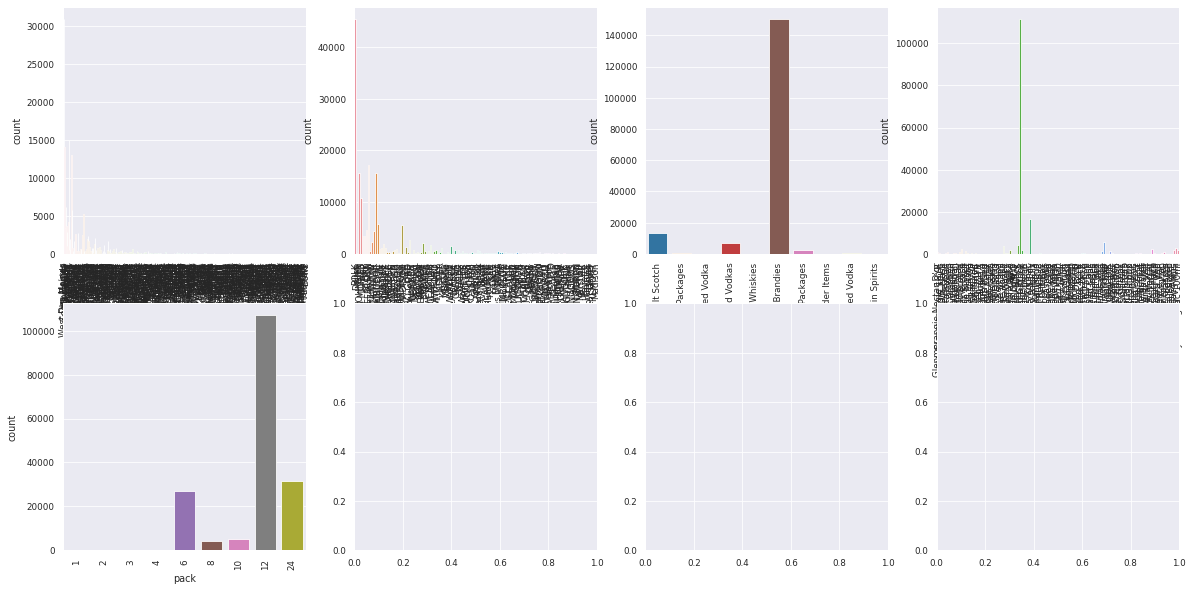

In [22]:
#Using plt.subplots, we can create a figure with a grid of 2 rows and 4 columns. Then we iterate over every categorical variable to create a countplot with seaborn

numerical = [
   'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'
]

categorical = [
  'city', 'county', 'category_name', 'item_description', 'pack'
]

data = df[numerical + categorical]
data.shape


fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

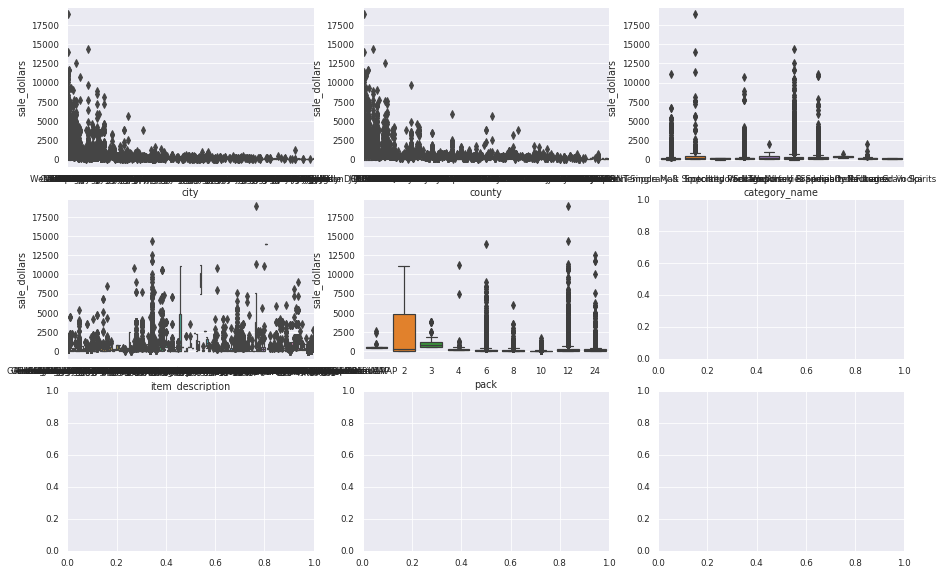

In [30]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='sale_dollars', data=df, ax=subplot)